In [10]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import kendalltau
sns.set(style="ticks")
import arrow

In [11]:
# The path to our CSV file
file = "rig_count_input.csv"

# Read our rig count data into pandas
df = pd.read_csv(file)

df['Unix'] = ''
df.head()


,DATE,Date_For_Analysis,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Delaware,D.C.,...,Utah,Vermont,Virginia,Wash.,W. Virgina,Wisconsin,Wyoming,TOTAL US,TOTAL,Unix
0,1/7/2000,2000-01,2.0,3.0,0.0,1.0,16.0,19.0,0.0,0.0,...,15.0,0.0,1.0,0.0,13.0,0.0,42.0,659.0,786.0,
1,1/14/2000,2000-01,2.0,6.0,0.0,0.0,16.0,18.0,0.0,0.0,...,14.0,0.0,0.0,0.0,13.0,0.0,41.0,656.0,781.0,
2,1/21/2000,2000-01,1.0,5.0,0.0,0.0,17.0,19.0,0.0,0.0,...,14.0,0.0,0.0,0.0,8.0,0.0,36.0,652.0,777.0,
3,1/28/2000,2000-01,1.0,4.0,0.0,0.0,17.0,17.0,0.0,0.0,...,13.0,0.0,0.0,0.0,5.0,0.0,36.0,630.0,755.0,
4,2/4/2000,2000-02,0.0,4.0,0.0,0.0,15.0,18.0,0.0,0.0,...,14.0,0.0,1.0,0.0,4.0,0.0,36.0,630.0,757.0,


In [12]:
#rig_count_df['holder'] = 1
#rig_count_df = df.pivot_table(index = 'Date_For_Analysis')#, aggfunc = 'sum')
#rig_count_df['Unix'] = ''
#rig_count_df['holder'] = rig_count_df['Date_For_Analysis']
#rig_count_df.head()

In [13]:

for s in range(0, 922, 1):
    test = arrow.get(df.iloc[(s, 1)], 'YYYY-MM')
    
    df.iloc[(s, 54)] = test.format('X')
    
df.head()

,DATE,Date_For_Analysis,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Delaware,D.C.,...,Utah,Vermont,Virginia,Wash.,W. Virgina,Wisconsin,Wyoming,TOTAL US,TOTAL,Unix
0,1/7/2000,2000-01,2.0,3.0,0.0,1.0,16.0,19.0,0.0,0.0,...,15.0,0.0,1.0,0.0,13.0,0.0,42.0,659.0,786.0,946684800
1,1/14/2000,2000-01,2.0,6.0,0.0,0.0,16.0,18.0,0.0,0.0,...,14.0,0.0,0.0,0.0,13.0,0.0,41.0,656.0,781.0,946684800
2,1/21/2000,2000-01,1.0,5.0,0.0,0.0,17.0,19.0,0.0,0.0,...,14.0,0.0,0.0,0.0,8.0,0.0,36.0,652.0,777.0,946684800
3,1/28/2000,2000-01,1.0,4.0,0.0,0.0,17.0,17.0,0.0,0.0,...,13.0,0.0,0.0,0.0,5.0,0.0,36.0,630.0,755.0,946684800
4,2/4/2000,2000-02,0.0,4.0,0.0,0.0,15.0,18.0,0.0,0.0,...,14.0,0.0,1.0,0.0,4.0,0.0,36.0,630.0,757.0,949363200


In [14]:
df['Unix'] = df['Unix'].convert_objects(convert_numeric=True)
df.dtypes

/Users/jeffreycoen/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


DATE                  object
Date_For_Analysis     object
Alabama              float64
Alaska               float64
Arizona              float64
Arkansas             float64
California           float64
Colorado             float64
Delaware             float64
D.C.                 float64
Florida              float64
Georgia              float64
Hawaii               float64
Idaho                float64
Illinois             float64
Indiana              float64
Iowa                 float64
Kansas               float64
Kentucky             float64
Louisiana            float64
Maine                float64
Maryland             float64
Mass.                float64
Michigan             float64
Minn.                float64
Mississippi          float64
Missouri             float64
Montana              float64
Nebraska             float64
Nevada               float64
N. Hamp.             float64
N. Jersey            float64
N. Mexico            float64
N. York              float64
N. Carolina   

In [15]:


rig_count_df = df.pivot_table(index = 'Unix')#, aggfunc = 'sum')

In [16]:
rig_count_df.sort_index(ascending = False) 

rig_count_df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,D.C.,Delaware,Florida,Georgia,...,TOTAL US,Tennesee,Texas,Utah,Vermont,Virginia,W. Virgina,Wash.,Wisconsin,Wyoming
Unix,,,,,,,,,,,,,,,,,,,,,
9.466848e+08,1.50,4.50,0.0,0.25,16.50,18.25,0.0,0.0,0.00,0.0,...,649.25,0.00,268.75,14.00,0.0,0.25,9.75,0.00,0.0,38.75
9.493632e+08,0.25,4.75,0.0,0.00,16.75,17.25,0.0,0.0,0.00,0.0,...,641.00,0.00,277.25,14.00,0.0,0.25,5.00,0.00,0.0,34.00
9.518688e+08,0.80,5.80,0.0,0.00,18.00,17.60,0.0,0.0,0.00,0.0,...,649.60,0.00,273.20,15.60,0.0,1.20,5.80,0.00,0.0,30.20
9.545472e+08,1.50,4.50,0.0,2.25,18.25,18.25,0.0,0.0,0.00,1.0,...,681.00,0.00,285.00,14.50,0.0,2.00,10.00,0.00,0.0,28.25
9.571392e+08,2.00,5.25,0.0,6.00,20.25,17.00,0.0,0.0,0.00,1.0,...,705.75,0.00,295.00,15.75,0.0,2.75,11.25,0.00,0.0,29.75
9.598176e+08,1.00,6.80,0.0,6.20,20.20,16.20,0.0,0.0,0.00,0.2,...,738.60,0.00,312.20,15.40,0.0,3.80,12.00,0.00,0.0,38.00
9.624096e+08,0.50,7.75,0.0,1.75,24.00,18.50,0.0,0.0,0.00,0.0,...,784.25,0.00,332.00,14.75,0.0,3.00,14.00,0.00,0.0,43.75
9.650880e+08,0.00,10.00,0.0,4.00,23.50,16.00,0.0,0.0,0.00,0.0,...,828.00,0.50,356.00,15.00,0.0,3.25,14.25,0.00,0.0,43.75
9.677664e+08,0.40,9.80,0.0,4.20,21.60,15.80,0.0,0.0,0.00,0.0,...,864.40,0.00,366.40,16.20,0.0,2.00,19.20,0.00,0.0,49.00


In [17]:
counter = 0

#rig_count_df['Time'] = ''
#rig_count_df['Unix'] = ''
# Populate the DF
for index, row in rig_count_df.iterrows():
    try:
        # Counter keeps track of where we are in record retrieval process
       counter += 1
       rig_count_df.set_value(index, "Time", counter)
        
        
        
                                      
                                      
       
    except:
       print('wut.')
       
        
        
rig_count_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,D.C.,Delaware,Florida,Georgia,...,Tennesee,Texas,Utah,Vermont,Virginia,W. Virgina,Wash.,Wisconsin,Wyoming,Time
Unix,,,,,,,,,,,,,,,,,,,,,
946684800.0,1.50,4.50,0.0,0.25,16.50,18.25,0.0,0.0,0.0,0.0,...,0.0,268.75,14.00,0.0,0.25,9.75,0.0,0.0,38.75,1.0
949363200.0,0.25,4.75,0.0,0.00,16.75,17.25,0.0,0.0,0.0,0.0,...,0.0,277.25,14.00,0.0,0.25,5.00,0.0,0.0,34.00,2.0
951868800.0,0.80,5.80,0.0,0.00,18.00,17.60,0.0,0.0,0.0,0.0,...,0.0,273.20,15.60,0.0,1.20,5.80,0.0,0.0,30.20,3.0
954547200.0,1.50,4.50,0.0,2.25,18.25,18.25,0.0,0.0,0.0,1.0,...,0.0,285.00,14.50,0.0,2.00,10.00,0.0,0.0,28.25,4.0
957139200.0,2.00,5.25,0.0,6.00,20.25,17.00,0.0,0.0,0.0,1.0,...,0.0,295.00,15.75,0.0,2.75,11.25,0.0,0.0,29.75,5.0


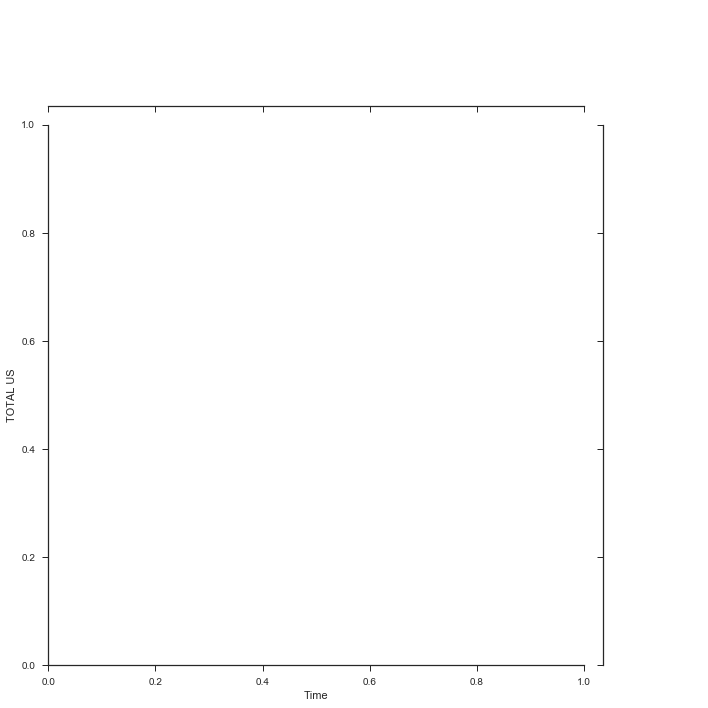

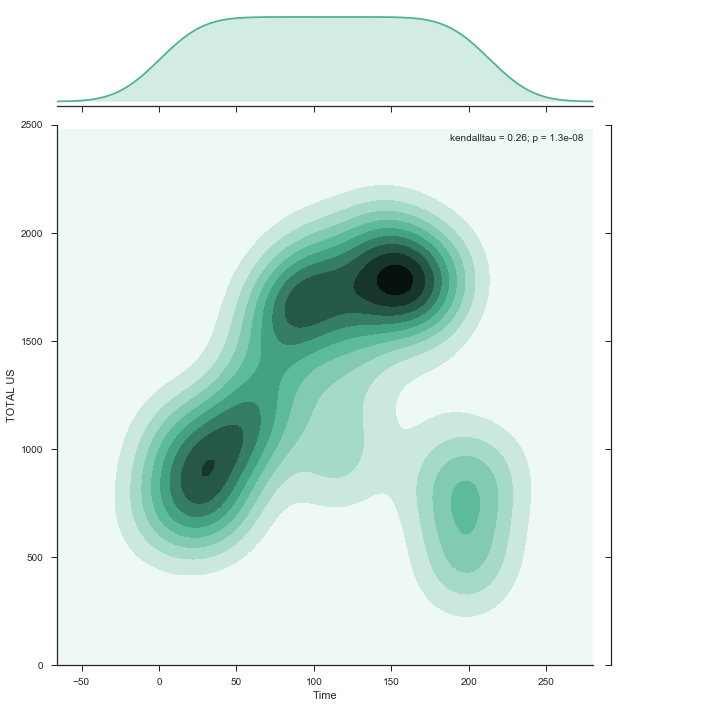

In [18]:
# Draw a KDE chart in Seaborn
sns.jointplot(x = rig_count_df['Time'], y = rig_count_df['TOTAL US'], size = 10 # data = rig_count_df
              , kind="kde", stat_func=kendalltau, color="#4CB391")

plt.xlim(0, 225)
plt.ylim(0, 2500)
plt.show()

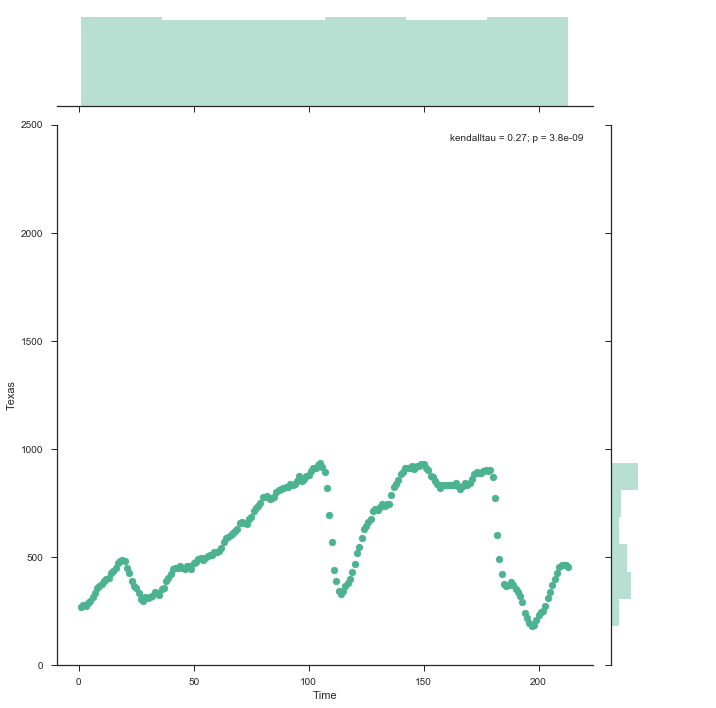

In [19]:
sns.jointplot(x = rig_count_df['Time'], y = rig_count_df['Texas'], size = 10
              , kind="scatter", stat_func=kendalltau, color="#4CB391")

plt.xlim(0, 225)
plt.ylim(0, 2500)
plt.show()

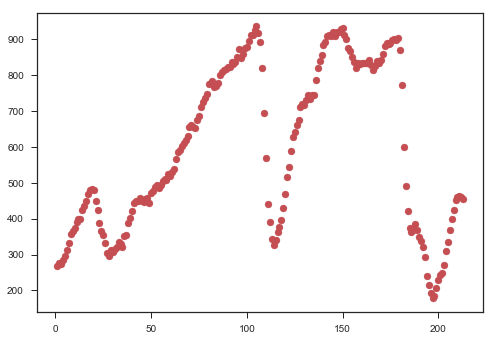

In [22]:
# Try to make a first chart
plt.scatter(x = 'Time', y = 'Texas', data = rig_count_df)
plt.show()


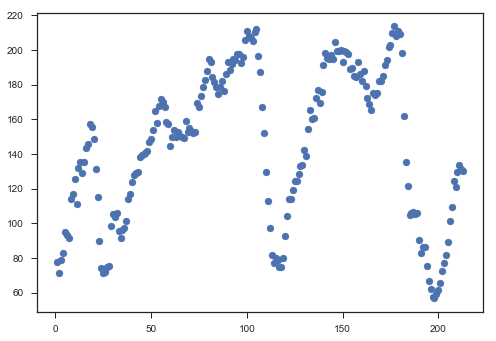

In [23]:
# Try to make a first chart
plt.scatter(x = 'Time', y = 'Oklahoma', data = rig_count_df)#, size = 6, aspect = 2 )
plt.show()

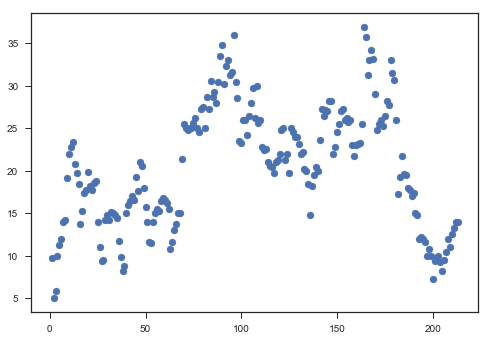

In [24]:
# Try to make a first chart
plt.scatter(x = 'Time', y = 'W. Virgina', data = rig_count_df)#, size = 6, aspect = 2 )
plt.show()

In [25]:
rig_count_df.to_csv("rig_count_output.csv")